## **Importing all the libraries**

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [15]:
from google.colab import files

# Upload a file
uploaded = files.upload()

Saving IMDb Movies India.csv to IMDb Movies India (1).csv


In [18]:
# Read the dataset
df = pd.read_csv('IMDb Movies India.csv', encoding='ISO-8859-1')

# Display basic information
print("Dataset Overview:\n")
df.info()
df.head()

Dataset Overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [19]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [20]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


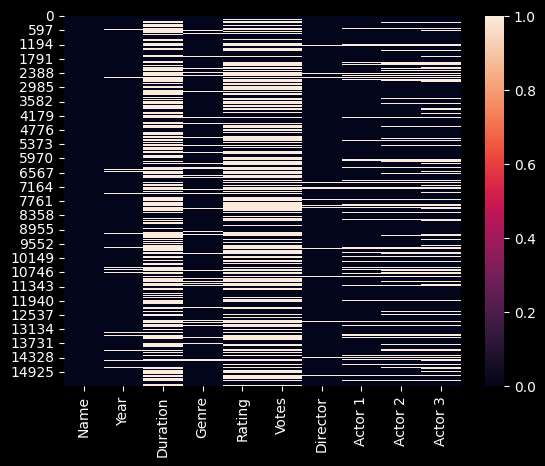

In [22]:
# calculating the no. of null values in the dataset in each coulmn
df.isnull().sum()
# visualising the null values with the help of heatmap
sns.heatmap(df.isnull());


In [25]:
missing_count=df.isnull().sum().sort_values(ascending=False)
print(missing_count)

Duration    8269
Rating      7590
Votes       7589
Actor 3     3144
Actor 2     2384
Genre       1877
Actor 1     1617
Year         528
Director     525
Name           0
dtype: int64


In [26]:
# deleting the rows which have null Ratings
df.dropna(subset=['Rating'],inplace=True)
# rounding off the null percentage upto 2 decimal points
(round(df.isnull().sum()/df.isnull().count(), 4)*100).sort_values(ascending=False)
#viewing the dataframe again to see the changes done
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15501,Zulm Ki Hukumat,(1992),NaN,"Action, Crime, Drama",5.3,135,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [27]:

# dropping the null values from the following coulmns
df.dropna(subset=['Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Genre'], inplace=True)
# rounding off the missing percentage
(round(df.isnull().sum()/df.isnull().count(), 4)*100).sort_values(ascending=False)

,0
Duration,25.13
Name,0.00
Year,0.00
Genre,0.00
Rating,0.00
Votes,0.00
Director,0.00
Actor 1,0.00
Actor 2,0.00
Actor 3,0.00


In [28]:
# converting the duration coulmn from string to number and removing the min from it
df['Duration']=pd.to_numeric(df['Duration'].str.strip(' min'))
# replacing the null duration values with the mean values of the duration
df['Duration'].fillna(df['Duration'].mean(),inplace=True)

In [29]:
# checking the number of null values in the data
df.isnull().sum()

,0
Name,0
Year,0
Duration,0
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,0
Actor 2,0
Actor 3,0


In [30]:
# resetting the index of the dataframe after dropping the values
df.reset_index(inplace=True)
# Again viewing the dataframe to see the changes
df

,index,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,1,#Gadhvi (He thought he was Gandhi),(2019),109.000000,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,3,#Yaaram,(2019),110.000000,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
2,5,...Aur Pyaar Ho Gaya,(1997),147.000000,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
3,6,...Yahaan,(2005),142.000000,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
4,8,?: A Question Mark,(2012),82.000000,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...,...
7553,15501,Zulm Ki Hukumat,(1992),133.439124,"Action, Crime, Drama",5.3,135,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
7554,15503,Zulm Ki Zanjeer,(1989),125.000000,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
7555,15504,Zulm Ko Jala Doonga,(1988),133.439124,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
7556,15505,Zulmi,(1999),129.000000,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [31]:
#dropping duplicate values from the dataframe
df.drop_duplicates(inplace=True)
# checking the shape of the dataframe
df.shape

(7558, 11)

In [32]:
# converting the year coulmn into integer from string
# removing the '(',')' from the data
df['Year'] = df['Year'].apply(lambda x: x.split(')')[0])

year_lst = []
for val in df['Year']:
    if len(val.split('(')) == 1:
        year_lst.append(val.split('(')[0])
    elif len(val.split('(')) > 1:
        year_lst.append(val.split('(')[1])
df['Year'] = year_lst

In [33]:
# removing the ',' from the votes coulmn and maiking it an integer
df['Votes'] = df['Votes'].str.replace(',', '').astype(int)
df['Year'] = df['Year'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7558 entries, 0 to 7557
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     7558 non-null   int64  
 1   Name      7558 non-null   object 
 2   Year      7558 non-null   int64  
 3   Duration  7558 non-null   float64
 4   Genre     7558 non-null   object 
 5   Rating    7558 non-null   float64
 6   Votes     7558 non-null   int64  
 7   Director  7558 non-null   object 
 8   Actor 1   7558 non-null   object 
 9   Actor 2   7558 non-null   object 
 10  Actor 3   7558 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 649.6+ KB


In [35]:
#Viewing number of unique years from the dataframe
df['Year'].unique()



array([2019, 1997, 2005, 2012, 2014, 2004, 2016, 1991, 2018, 2010, 1958,
       2021, 2017, 2009, 1993, 2002, 1946, 2008, 1994, 2007, 2013, 2003,
       1998, 1979, 1974, 2015, 2006, 1981, 2020, 1985, 2011, 1988, 1995,
       1987, 1999, 1973, 1968, 1953, 1986, 1982, 1977, 1950, 1969, 1948,
       1967, 1970, 1990, 1989, 1947, 2001, 2000, 1971, 1978, 1944, 1963,
       1992, 1976, 1984, 1975, 1980, 1966, 1972, 1956, 1960, 1964, 1952,
       1959, 1951, 1954, 1962, 1961, 1957, 1965, 1996, 1933, 1955, 1983,
       1936, 1949, 1940, 1945, 1938, 1941, 1942, 1932, 1935, 1937, 1931,
       1943, 1917, 1939, 1934])

In [37]:
# checking the attributes of the numerical data
df[['Rating', 'Duration', 'Votes']].describe(percentiles=[0.75,0.8, 0.9, 0.95, 0.98])

,Rating,Duration,Votes
count,7558.000000,7558.000000,7558.000000
mean,5.811127,133.439124,2029.123842
std,1.368255,21.908841,11868.695754
min,1.100000,21.000000,5.000000
50%,6.000000,133.439124,61.000000
75%,6.800000,144.000000,456.000000
80%,7.000000,149.000000,797.600000
90%,7.400000,160.000000,3182.900000
95%,7.800000,169.000000,8662.150000
98%,8.200000,180.000000,21935.900000


**Exploratory Data Analysis (EDA)**

### 1.Year with the Best Ratings


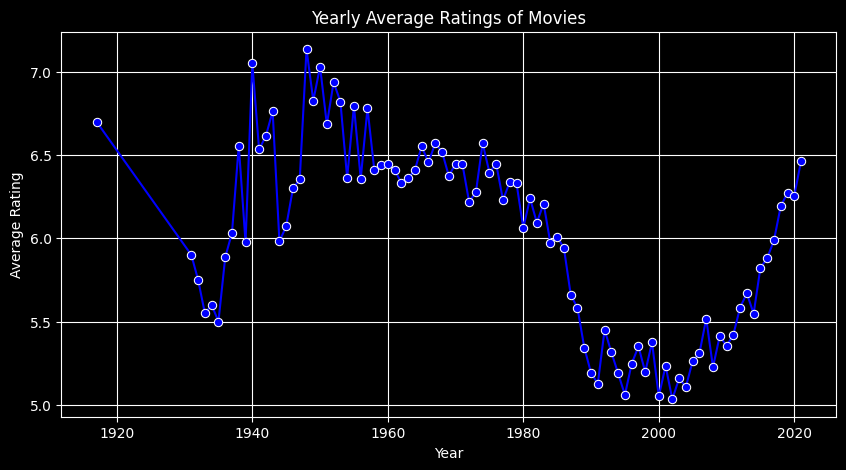

In [38]:
# Group by Year and find the average rating
best_year = df.groupby("Year")["Rating"].mean().sort_values(ascending=False)

# Plot Ratings vs Year
plt.figure(figsize=(10, 5))
sns.lineplot(x=best_year.index, y=best_year.values, marker="o", color="blue")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.title("Yearly Average Ratings of Movies")
plt.grid()
plt.show()


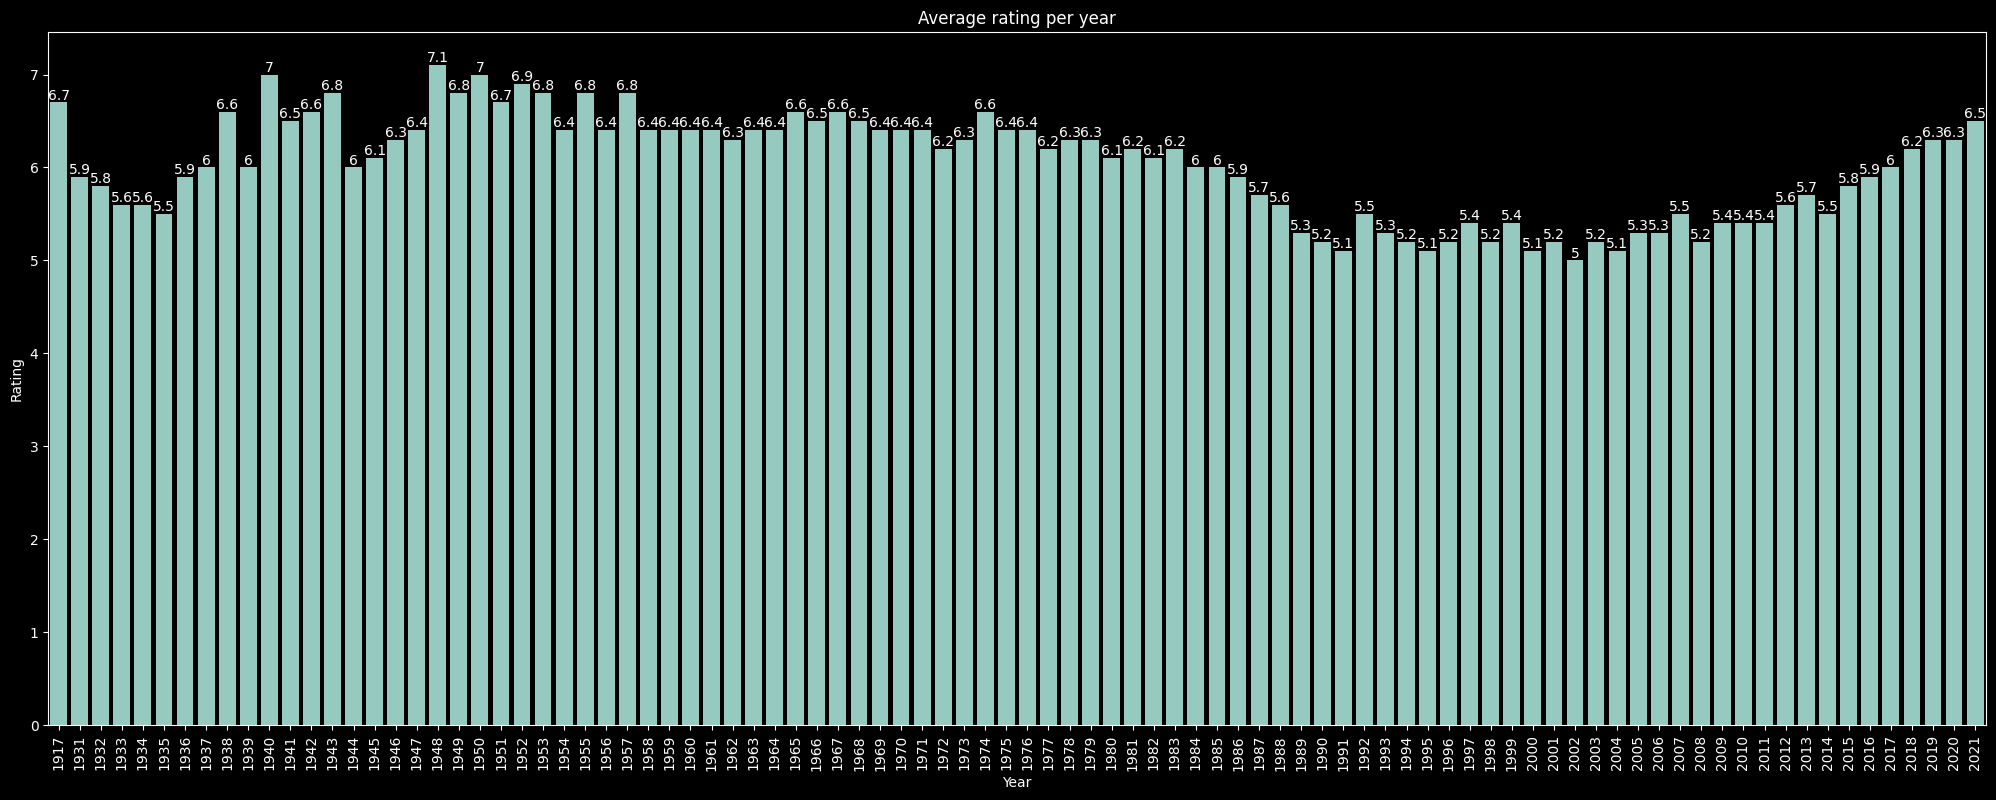

In [43]:
# Distribution of Average ratings of the movies in a particular year
year_rating=df.groupby('Year').agg({'Rating': 'mean'}).reset_index().sort_values(by='Rating',ascending=False)
year_rating['Rating']=round(year_rating['Rating'],1)
plt.figure(figsize=(25,9))
ax = sns.barplot(data=year_rating, x='Year', y='Rating')
ax.bar_label(ax.containers[0])
plt.title('Average rating per year')
plt.xticks(rotation=90)
plt.show()

### 2. Does Movie Duration Affect Ratings?

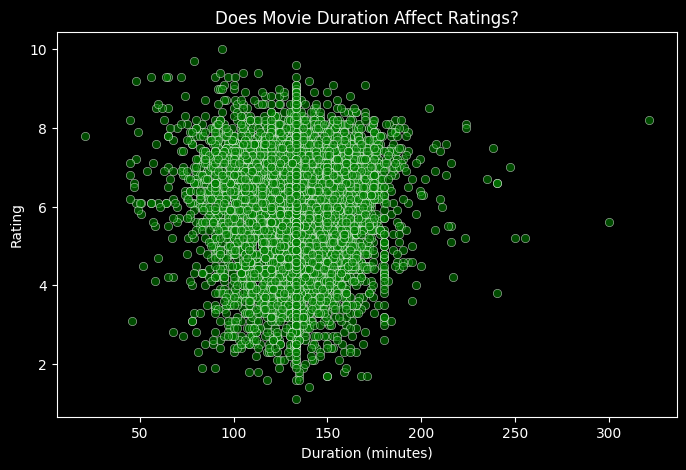

In [39]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Duration"], y=df["Rating"], alpha=0.6, color="green")
plt.xlabel("Duration (minutes)")
plt.ylabel("Rating")
plt.title("Does Movie Duration Affect Ratings?")
plt.show()


### 3. Top 10 Highest-Rated Movies

In [40]:
top_movies = df.sort_values("Rating", ascending=False).head(10)
print("Top 10 Highest Rated Movies:\n", top_movies[["Name", "Year", "Rating"]])


Top 10 Highest Rated Movies:
                      Name  Year  Rating
4179      Love Qubool Hai  2020    10.0
2716           Half Songs  2021     9.7
1288                Breed  2020     9.6
2546         Gho Gho Rani  2019     9.4
6901  The Reluctant Crime  2020     9.4
3439                 June  2021     9.4
4508                Meher  2020     9.3
6425           Sindhustan  2019     9.3
709          Ashok Vatika  2018     9.3
913              Baikunth  2021     9.3


### 4. Number of Popular Movies Released Per Year

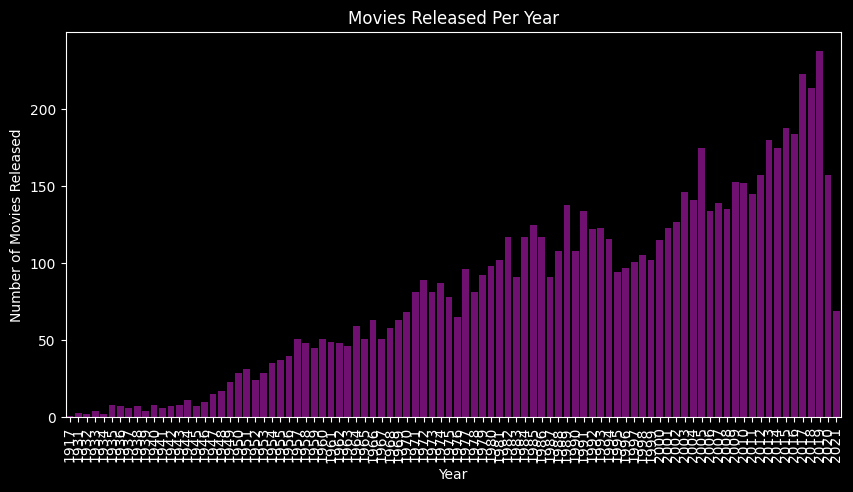

In [41]:
movies_per_year = df["Year"].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.barplot(x=movies_per_year.index, y=movies_per_year.values, color="purple")
plt.xlabel("Year")
plt.ylabel("Number of Movies Released")
plt.title("Movies Released Per Year")
plt.xticks(rotation=90)
plt.show()


### Most Successful Director

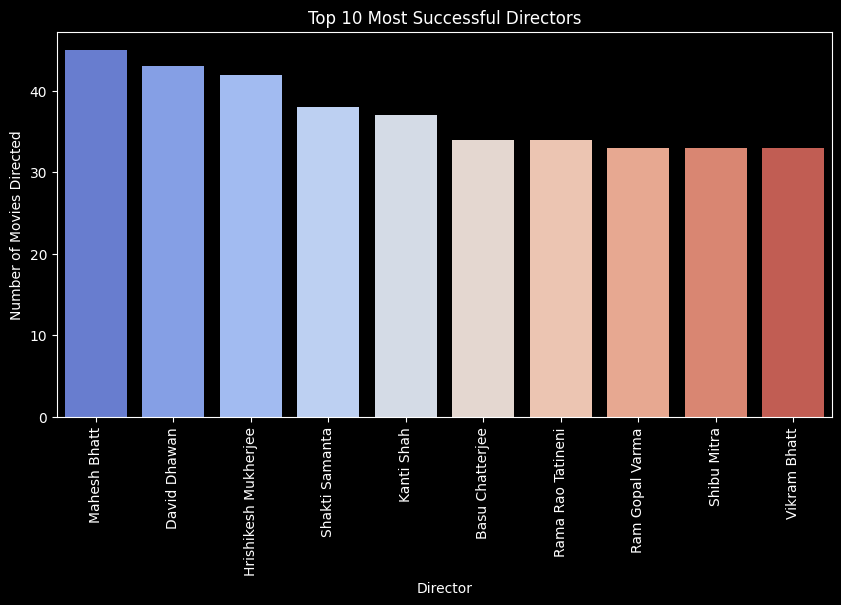

In [42]:
top_directors = df["Director"].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_directors.index, y=top_directors.values, palette="coolwarm")
plt.xlabel("Director")
plt.ylabel("Number of Movies Directed")
plt.title("Top 10 Most Successful Directors")
plt.xticks(rotation=90)
plt.show()


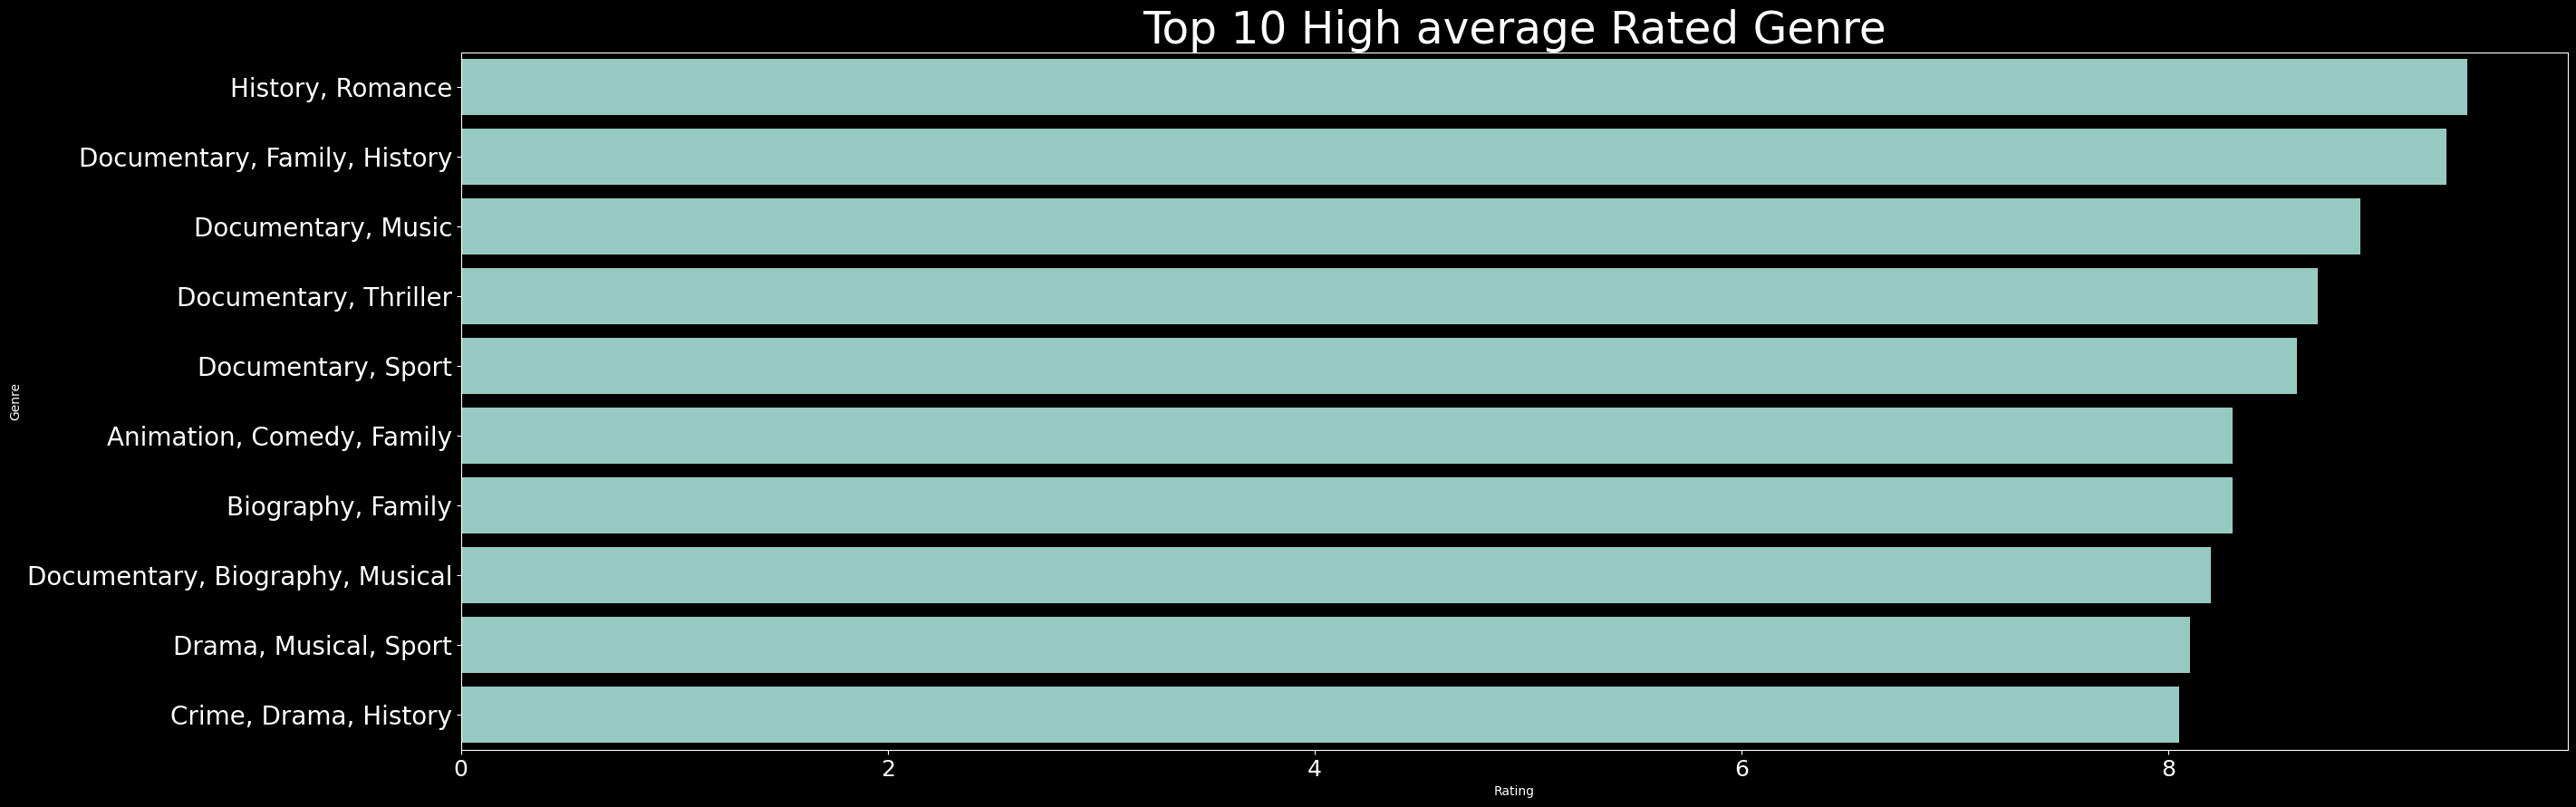

In [44]:
genre_rate=df.groupby("Genre").agg({'Rating':'mean'}).sort_values(by='Rating',ascending=False).reset_index().head(10)
plt.figure(figsize=(30,10))
sns.barplot(x="Rating",y="Genre",data=genre_rate)
plt.yticks(size=20)
plt.xticks(size=18)
plt.title("Top 10 High average Rated Genre",size=35)
plt.show()

In [45]:
# Making a different dataset for predicting the Ratings so that we don't lose our original cleaned data
df_new=df.drop('Name',axis=1)
df_new

,index,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,1,2019,109.000000,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,3,2019,110.000000,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
2,5,1997,147.000000,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
3,6,2005,142.000000,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
4,8,2012,82.000000,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
7553,15501,1992,133.439124,"Action, Crime, Drama",5.3,135,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
7554,15503,1989,125.000000,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
7555,15504,1988,133.439124,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
7556,15505,1999,129.000000,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [46]:
df_new.drop('index',axis=1,inplace=True)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7558 entries, 0 to 7557
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      7558 non-null   int64  
 1   Duration  7558 non-null   float64
 2   Genre     7558 non-null   object 
 3   Rating    7558 non-null   float64
 4   Votes     7558 non-null   int64  
 5   Director  7558 non-null   object 
 6   Actor 1   7558 non-null   object 
 7   Actor 2   7558 non-null   object 
 8   Actor 3   7558 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 531.6+ KB


## **Encoding Categorical Features Using Mean Ratings**
The idea:

Actors, Directors, and Genres with higher average ratings tend to be more successful.

Instead of arbitrary labels, we map each category to its mean IMDb rating.

In [47]:
# Compute mean ratings for each category
actor1_encoded = df_new.groupby('Actor 1').agg({'Rating': 'mean'}).to_dict()
actor2_encoded = df_new.groupby('Actor 2').agg({'Rating': 'mean'}).to_dict()
actor3_encoded = df_new.groupby('Actor 3').agg({'Rating': 'mean'}).to_dict()
director_encoded = df_new.groupby('Director').agg({'Rating': 'mean'}).to_dict()
genre_encoded = df_new.groupby('Genre').agg({'Rating': 'mean'}).to_dict()

# Map these values to the dataframe
df_new['actor1_encoded'] = round(df_new['Actor 1'].map(actor1_encoded['Rating']), 1)
df_new['actor2_encoded'] = round(df_new['Actor 2'].map(actor2_encoded['Rating']), 1)
df_new['actor3_encoded'] = round(df_new['Actor 3'].map(actor3_encoded['Rating']), 1)
df_new['director_encoded'] = round(df_new['Director'].map(director_encoded['Rating']), 1)
df_new['genre_encoded'] = round(df_new['Genre'].map(genre_encoded['Rating']), 1)

# Display updated dataframe
df_new.head()


,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,actor1_encoded,actor2_encoded,actor3_encoded,director_encoded,genre_encoded
0,2019,109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,6.8,7.0,7.0,7.0,6.3
1,2019,110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,5.4,4.4,4.4,4.4,5.7
2,1997,147.0,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,4.8,5.8,5.8,5.4,6.2
3,2005,142.0,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,5.3,6.0,6.5,7.5,6.8
4,2012,82.0,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,5.6,5.9,5.6,5.6,5.5


In [48]:
df_new.drop(['Actor 1','Actor 2','Actor 3','Director','Genre'],axis=1,inplace=True)
df_new

,Year,Duration,Rating,Votes,actor1_encoded,actor2_encoded,actor3_encoded,director_encoded,genre_encoded
0,2019,109.000000,7.0,8,6.8,7.0,7.0,7.0,6.3
1,2019,110.000000,4.4,35,5.4,4.4,4.4,4.4,5.7
2,1997,147.000000,4.7,827,4.8,5.8,5.8,5.4,6.2
3,2005,142.000000,7.4,1086,5.3,6.0,6.5,7.5,6.8
4,2012,82.000000,5.6,326,5.6,5.9,5.6,5.6,5.5
...,...,...,...,...,...,...,...,...,...
7553,1992,133.439124,5.3,135,5.7,6.1,4.9,5.6,5.6
7554,1989,125.000000,5.8,44,6.3,5.8,5.8,5.9,5.6
7555,1988,133.439124,4.6,11,6.0,3.7,4.6,4.1,5.0
7556,1999,129.000000,4.5,655,5.5,4.6,5.6,5.2,5.5


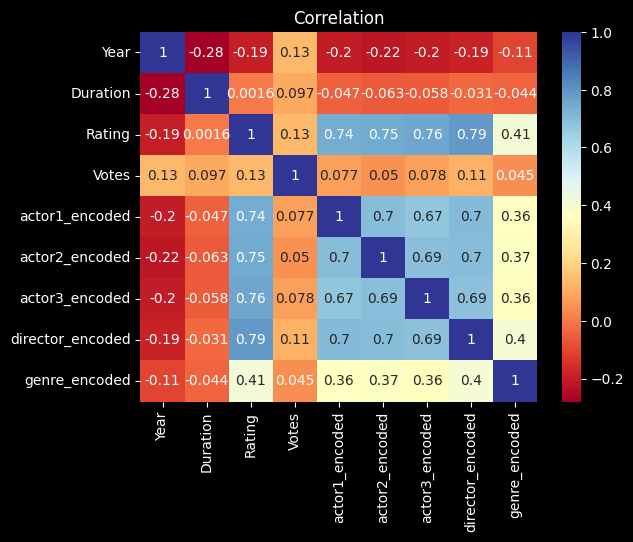

In [49]:
# Lets see if there is any Correlation in the data
sns.heatmap(df_new.corr(), annot=True, cmap='RdYlBu')
plt.title('Correlation')
plt.show()

In [50]:
X=df_new.drop('Rating',axis=1)
Y=df_new['Rating']
X.head(5)

,Year,Duration,Votes,actor1_encoded,actor2_encoded,actor3_encoded,director_encoded,genre_encoded
0,2019,109.0,8,6.8,7.0,7.0,7.0,6.3
1,2019,110.0,35,5.4,4.4,4.4,4.4,5.7
2,1997,147.0,827,4.8,5.8,5.8,5.4,6.2
3,2005,142.0,1086,5.3,6.0,6.5,7.5,6.8
4,2012,82.0,326,5.6,5.9,5.6,5.6,5.5


In [51]:
# splitting the data for training and testing
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,train_size=0.8,random_state=42)

In [52]:
print("Shape of training Data ",X_train.shape)
print("Shape of training target ",Y_train.shape)
print("Shape of testing Data ",X_test.shape)
print("Shape of testing target ",Y_test.shape)

Shape of training Data  (6046, 8)
Shape of training target  (6046,)
Shape of testing Data  (1512, 8)
Shape of testing target  (1512,)


In [57]:
from sklearn.linear_model import LinearRegression

# Building a Linear Regression model
LR = LinearRegression()
LR.fit(X_train, Y_train)

print("Coefficient of Determination (R²) on Training Data:", LR.score(X_train, Y_train))

# Predictions
y_pred_LR = LR.predict(X_test)

# Evaluating the model
print("📌 Linear Regression Performance:")
print("R²: ", r2_score(Y_test, y_pred_LR))
print("MAE: ", mean_absolute_error(Y_test, y_pred_LR))
print("MSE: ", mean_squared_error(Y_test, y_pred_LR))
print("RMSE: ", np.sqrt(mean_squared_error(Y_test, y_pred_LR)))

# Create results dataframe
results_LR = pd.DataFrame({'Actual': Y_test,
                           'Predicted': y_pred_LR.ravel(),
                           'Residual': Y_test - y_pred_LR})
results_LR.head()




Coefficient of Determination (R²) on Training Data: 0.7613579123839522
📌 Linear Regression Performance:
R²:  0.7580529126852417
MAE:  0.4983995226829543
MSE:  0.44828860955357486
RMSE:  0.6695435830127676


,Actual,Predicted,Residual
3148,7.4,6.617484,0.782516
1662,4.9,5.485182,-0.585182
3078,6.5,6.324062,0.175938
3012,5.7,5.552979,0.147021
3332,7.0,6.973330,0.026670


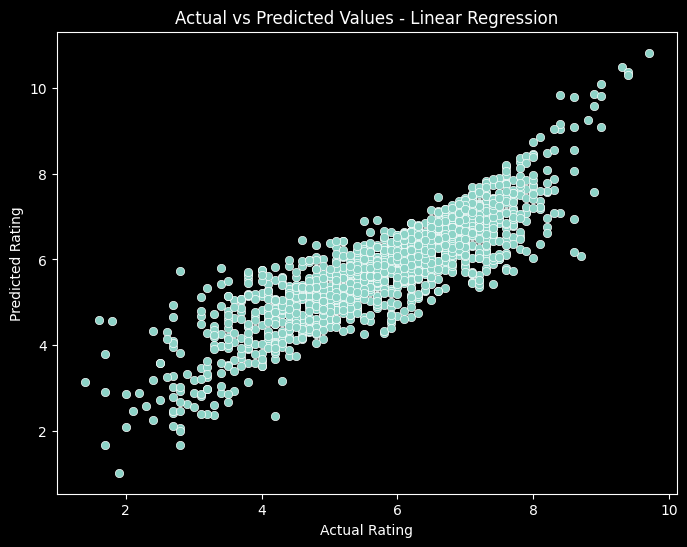

In [60]:
# Visualization
plt.figure(figsize=(8, 6))
plt.title("Actual vs Predicted Values - Linear Regression")
sns.scatterplot(x=results_LR['Actual'], y=results_LR['Predicted'])
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.show()

In [54]:
from sklearn.tree import DecisionTreeRegressor

# Building a Decision Tree model
DT = DecisionTreeRegressor(random_state=42)
DT.fit(X_train, Y_train)

# Print Coefficient of Determination (R² Score)
print("Coefficient of determination (Train Data):", DT.score(X_train, Y_train))

# Predict on test data
y_pred_DT = DT.predict(X_test)

# Evaluate Model Performance
print('R² Score (Test Data):', r2_score(Y_test, y_pred_DT))
print('MAE:', mean_absolute_error(Y_test, y_pred_DT))
print('MSE:', mean_squared_error(Y_test, y_pred_DT))
print('RMSE:', np.sqrt(mean_squared_error(Y_test, y_pred_DT)))

# Store results in a DataFrame
results_DT = pd.DataFrame({
    'Actual': Y_test,
    'Predicted': y_pred_DT,
    'Residual': Y_test - y_pred_DT
})
results_DT.head()


Coefficient of determination (Train Data): 1.0
R² Score (Test Data): 0.5539373901041913
MAE: 0.6310846560846561
MSE: 0.8264814814814814
RMSE: 0.9091102691541226


,Actual,Predicted,Residual
3148,7.4,7.6,-2.000000e-01
1662,4.9,6.7,-1.800000e+00
3078,6.5,6.0,5.000000e-01
3012,5.7,5.7,-8.881784e-16
3332,7.0,7.0,0.000000e+00


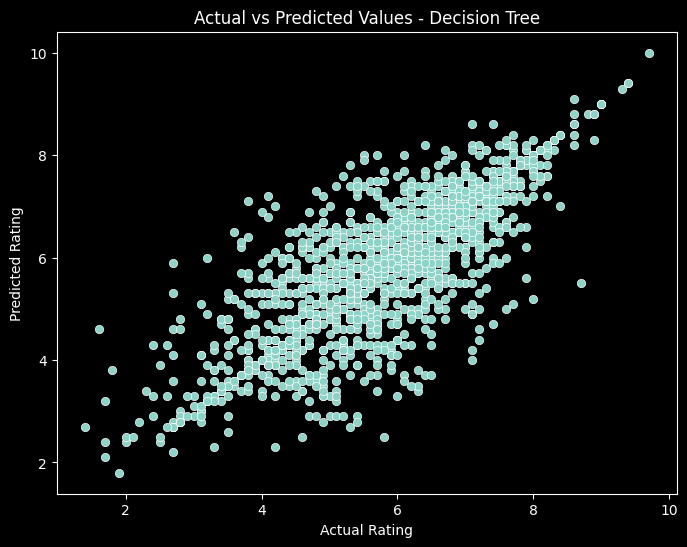

In [61]:
# Visualization
plt.figure(figsize=(8, 6))
plt.title("Actual vs Predicted Values - Decision Tree")
sns.scatterplot(x=results_DT['Actual'], y=results_DT['Predicted'])
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.show()

In [55]:
from sklearn.ensemble import RandomForestRegressor

# Building a Random Forest model
RF = RandomForestRegressor(n_estimators=100, random_state=42)
RF.fit(X_train, Y_train)

# Print Coefficient of Determination (R² Score)
print("Coefficient of determination (Train Data):", RF.score(X_train, Y_train))

# Predict on test data
y_pred_RF = RF.predict(X_test)

# Evaluate Model Performance
print('R² Score (Test Data):', r2_score(Y_test, y_pred_RF))
print('MAE:', mean_absolute_error(Y_test, y_pred_RF))
print('MSE:', mean_squared_error(Y_test, y_pred_RF))
print('RMSE:', np.sqrt(mean_squared_error(Y_test, y_pred_RF)))

# Store results in a DataFrame
results_RF = pd.DataFrame({
    'Actual': Y_test,
    'Predicted': y_pred_RF,
    'Residual': Y_test - y_pred_RF
})
results_RF.head()


Coefficient of determination (Train Data): 0.9723943614400483
R² Score (Test Data): 0.7944659674626864
MAE: 0.431255291005291
MSE: 0.38082114021164015
RMSE: 0.6171070735388148


,Actual,Predicted,Residual
3148,7.4,7.279,0.121
1662,4.9,5.434,-0.534
3078,6.5,6.217,0.283
3012,5.7,5.714,-0.014
3332,7.0,6.961,0.039


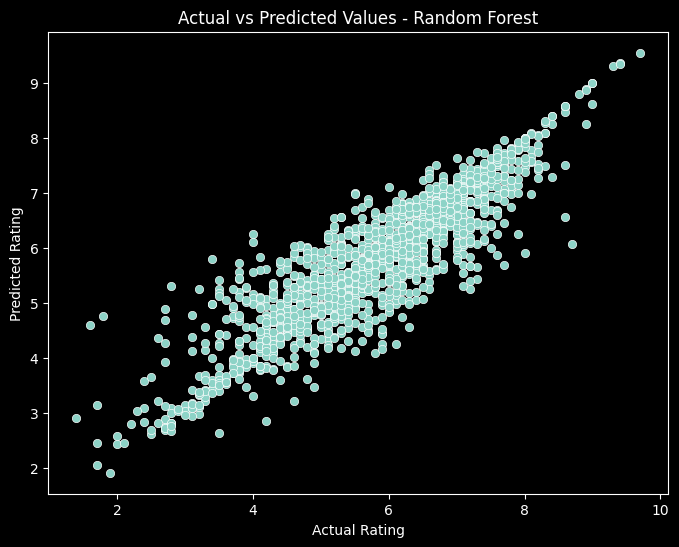

In [62]:
# Visualization
plt.figure(figsize=(8, 6))
plt.title("Actual vs Predicted Values - Random Forest")
sns.scatterplot(x=results_RF['Actual'], y=results_RF['Predicted'])
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.show()

In [64]:
# Create a dictionary to store model performance
model_results = {
    "Model": ["Linear Regression", "Decision Tree", "Random Forest"],
    "R² Score": [
        r2_score(Y_test, y_pred_LR),
        r2_score(Y_test, y_pred_DT),
        r2_score(Y_test, y_pred_RF),
    ],
    "MAE": [
        mean_absolute_error(Y_test, y_pred_LR),
        mean_absolute_error(Y_test, y_pred_DT),
        mean_absolute_error(Y_test, y_pred_RF),
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(Y_test, y_pred_LR)),
        np.sqrt(mean_squared_error(Y_test, y_pred_DT)),
        np.sqrt(mean_squared_error(Y_test, y_pred_RF)),
    ]
}

# Convert dictionary into a DataFrame
results_df = pd.DataFrame(model_results)

# Display the table
print(" Model Performance Comparison:")
print(results_df)


 Model Performance Comparison:
               Model  R² Score       MAE      RMSE
0  Linear Regression  0.758053  0.498400  0.669544
1      Decision Tree  0.553937  0.631085  0.909110
2      Random Forest  0.794466  0.431255  0.617107


In [66]:
# Find the best model based on highest R² Score
best_model_index = results_df["R² Score"].idxmax()
best_model_name = results_df.loc[best_model_index, "Model"]

print(f"\n Best Performing Model: {best_model_name}")



 Best Performing Model: Random Forest
